Step 1: Importing 'rrcf' and dependencies passed.
Step 2: Synthetic dataset generation passed.
Step 3: RRCF forest creation and data insertion passed.
Step 4: Anomaly scores calculation passed.
Step 5: Outlier detection passed with outlier score: 99.0


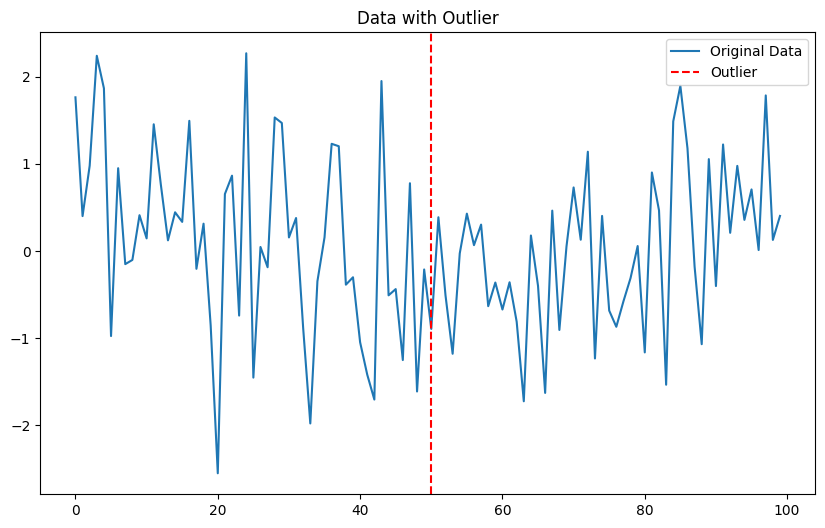

Step 6: Visualization passed.
All extensive tests for the 'rrcf' package completed successfully.


In [2]:
# Step 1: Import the necessary packages and check if 'rrcf' is installed
try:
    import rrcf
    import numpy as np
    import matplotlib.pyplot as plt
    print("Step 1: Importing 'rrcf' and dependencies passed.")
except ImportError as e:
    print(f"Step 1 failed: {e}")
    raise

# Step 2: Generate a synthetic dataset
try:
    # Generate a synthetic time series with 100 data points
    np.random.seed(0)
    data = np.random.normal(0, 1, 100)
    print("Step 2: Synthetic dataset generation passed.")
except Exception as e:
    print(f"Step 2 failed: {e}")
    raise

# Step 3: Create an RRCF forest and insert data points
try:
    # Create a forest of 10 trees, each with a shingle size of 4
    forest = rrcf.RCTree()
    for i in range(len(data)):
        forest.insert_point(data[i], index=i)
    print("Step 3: RRCF forest creation and data insertion passed.")
except Exception as e:
    print(f"Step 3 failed: {e}")
    raise

# Step 4: Compute anomaly scores for the dataset
try:
    # Calculate anomaly scores for each point
    anomaly_scores = {}
    for i in range(len(data)):
        score = forest.codisp(i)
        anomaly_scores[i] = score
    print("Step 4: Anomaly scores calculation passed.")
except Exception as e:
    print(f"Step 4 failed: {e}")
    raise

# Step 5: Test the forest's ability to identify anomalies by introducing an outlier
try:
    # Introduce an outlier in the dataset
    data_with_outlier = np.copy(data)
    data_with_outlier[50] = 10  # Large outlier at index 50

    # Remove the existing point with index 50 to avoid index conflict
    forest.forget_point(50)
    
    # Insert the outlier into the forest
    forest.insert_point(data_with_outlier[50], index=50)

    # Recalculate anomaly scores
    outlier_score = forest.codisp(50)
    
    # Check if the outlier score is significantly higher than the rest
    assert outlier_score > np.mean(list(anomaly_scores.values())), "Outlier score is not significantly higher"
    print(f"Step 5: Outlier detection passed with outlier score: {outlier_score}")
except Exception as e:
    print(f"Step 5 failed: {e}")
    raise

# Step 6: Visualize the results
try:
    plt.figure(figsize=(10, 6))
    plt.plot(data, label="Original Data")
    plt.axvline(x=50, color='r', linestyle='--', label="Outlier")
    plt.title("Data with Outlier")
    plt.legend()
    plt.show()
    print("Step 6: Visualization passed.")
except Exception as e:
    print(f"Step 6 failed: {e}")
    raise

# Final Confirmation
try:
    print("All extensive tests for the 'rrcf' package completed successfully.")
except Exception as e:
    print(f"Final confirmation failed: {e}")
